0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


c:\Users\Hyeon Bin Lee\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\envs\classic_control\cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(
c:\Users\Hyeon Bin Lee\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


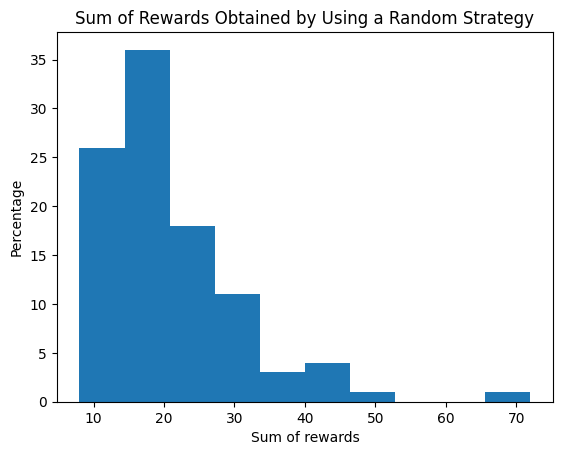

0
1
2
3
4
5
6
7
8
9
10


In [9]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt 

# Import the Q-Learning class from the Q_Learning.ipynb notebook
import ipynb
from ipynb.fs.full.Q_Learning import Q_Learning

# Create the CartPole environment
env = gym.make('CartPole-v1', render_mode='human')
(state, _) = env.reset()

# Define the parameters for state discretization
upperBounds = env.observation_space.high
lowerBounds = env.observation_space.low
cartVelocityMin = -3
cartVelocityMax = 3
poleAngularVelocityMin = -10
poleAngularVelocityMax = 10
upperBounds[1] = cartVelocityMax
upperBounds[3] = poleAngularVelocityMax
lowerBounds[1] = cartVelocityMin
lowerBounds[3] = poleAngularVelocityMin

# Define the number of bins for state discretization
numberOfBinsPosition = 30
numberOfBinsVelocity = 30
numberOfBinsAngle = 30
numberOfBinsAngularVelocity = 30
numberOfBins = [numberOfBinsPosition, numberOfBinsVelocity, numberOfBinsAngle, numberOfBinsAngularVelocity]

# Define the parameters for Q-Learning
alpha = 0.1
gamma = 1
epsilon = 0.2
numberOfEpisodes = 15000

# Create an instance of the Q-Learning class
Q = Q_Learning(env, alpha, gamma, epsilon, numberOfEpisodes, numberOfBins, lowerBounds, upperBounds)

# Run the Q-Learning algorithm
Q.simulateEpisodes()

# Simulate the learned strategy
(obtainedRewardsOptimal, env1) = Q.simulateLearnedStrategy()

# Plot the convergence graph
plt.figure(figsize=(12, 5))
plt.plot(A.sumRewardsEpisode, color='blue', linewidth=1)
plt.title('Rewards Obtained During the Learning Episodes')
plt.xlabel('Episode')
plt.ylabel('Sum of Rewards in Episode')
plt.yscale('log')
plt.savefig('convergence.png')
plt.show()

# Close the environment
env1.close()

# Calculate the sum of rewards obtained from the learned strategy
np.sum(obtainedRewardsOptimal)

# Simulate a random strategy
(obtainedRewardsRandom, env2) = Q.simulateRandomStrategy()

# Plot the histogram of rewards obtained from the random strategy
plt.hist(obtainedRewardsRandom)
plt.title('Sum of Rewards Obtained by Using a Random Strategy')
plt.xlabel('Sum of rewards')
plt.ylabel('Percentage')
plt.savefig('histogram.png')
plt.show()

# Simulate the learned strategy again for comparison
(obtainedRewardsOptimal, env1) = Q.simulateLearnedStrategy()

In [8]:
env.close()